In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline
#plt.rc('font', family='AppleGothic')

sns.set_palette('Set2', n_colors=10)  #seaborn은 테마, 팔레트 설정이 필요함
plt.rc('axes', unicode_minus=False) #seaborn '테마 => 팔레트 => 폰트 => 폰트깨질경우' 순으로 설정

In [3]:
# 데이터 불러오기
df = pd.read_csv('방송통신위원회_해외방송시장조사_OTT 서비스 주 이용 시청기기_20220711.csv', encoding='euc-kr')
df.head()

,연번,조사연도,국가,분류,구분,사례수(명),텔레비전(비율),스마트폰(비율),데스크탑컴퓨터(비율),노트북(비율),태블릿(비율),차량용디지털멀티미디어방송(비율)
0,1,2020,영국,국가별,전체,373,44.2,29.2,6.7,12.6,6.4,0.8
1,2,2020,호주,국가별,전체,301,41.2,22.9,8.3,20.3,7.0,0.3
2,3,2020,러시아,국가별,전체,367,23.4,37.9,14.2,16.1,7.4,1.1
3,4,2020,브라질,국가별,전체,368,45.1,38.0,4.9,9.2,1.9,0.8
4,5,2020,UAE,국가별,전체,355,26.5,42.0,6.2,20.0,3.9,1.4


In [4]:
# '구분' 열이 '전체'이고 '분류' 열이 '국가별'인 데이터를 필터링
filtered_df = df[(df['구분'] == '전체') & (df['분류'] == '국가별')]

# 추출할 열 목록을 정의
columns_to_extract = ['국가', '텔레비전(비율)', '스마트폰(비율)', '데스크탑컴퓨터(비율)', '노트북(비율)', '태블릿(비율)', '차량용디지털멀티미디어방송(비율)']

# 위에서 정의한 열 목록을 사용하여 filtered_df에서 필요한 열만 추출
extracted_df = filtered_df[columns_to_extract]

# 국가를 인덱스로 설정
df_total = extracted_df.set_index('국가', inplace=False)

df_total

,텔레비전(비율),스마트폰(비율),데스크탑컴퓨터(비율),노트북(비율),태블릿(비율),차량용디지털멀티미디어방송(비율)
국가,,,,,,
영국,44.2,29.2,6.7,12.6,6.4,0.8
호주,41.2,22.9,8.3,20.3,7.0,0.3
러시아,23.4,37.9,14.2,16.1,7.4,1.1
브라질,45.1,38.0,4.9,9.2,1.9,0.8
UAE,26.5,42.0,6.2,20.0,3.9,1.4


In [5]:
# 기업 입장에서는 스마트폰과 태블릿, 데스크탑과 노트북을 구분하여 정책을 만들기 힘듦

# 텔레비전(비율)을 TV로 변경
df_total = df_total.rename(columns={'텔레비전(비율)': 'TV'})

# 스마트폰(비율)와 태블릿(비율)을 더하고 MOBILE 컬럼 추가
df_total['MOBILE'] = df_total['스마트폰(비율)'] + df_total['태블릿(비율)']

# 데스크탑컴퓨터(비율)와 노트북(비율)을 더하고 PC 컬럼 추가
df_total['PC'] = df_total['데스크탑컴퓨터(비율)'] + df_total['노트북(비율)']

# 차량용디지털멀티미디어방송(비율)을 CAR로 변경
df_total = df_total.rename(columns={'차량용디지털멀티미디어방송(비율)': 'CAR'})

# 컬럼 순서 변경
df_total = df_total[['TV', 'MOBILE', 'PC', 'CAR']]

df_total

,TV,MOBILE,PC,CAR
국가,,,,
영국,44.2,35.6,19.3,0.8
호주,41.2,29.9,28.6,0.3
러시아,23.4,45.3,30.3,1.1
브라질,45.1,39.9,14.1,0.8
UAE,26.5,45.9,26.2,1.4


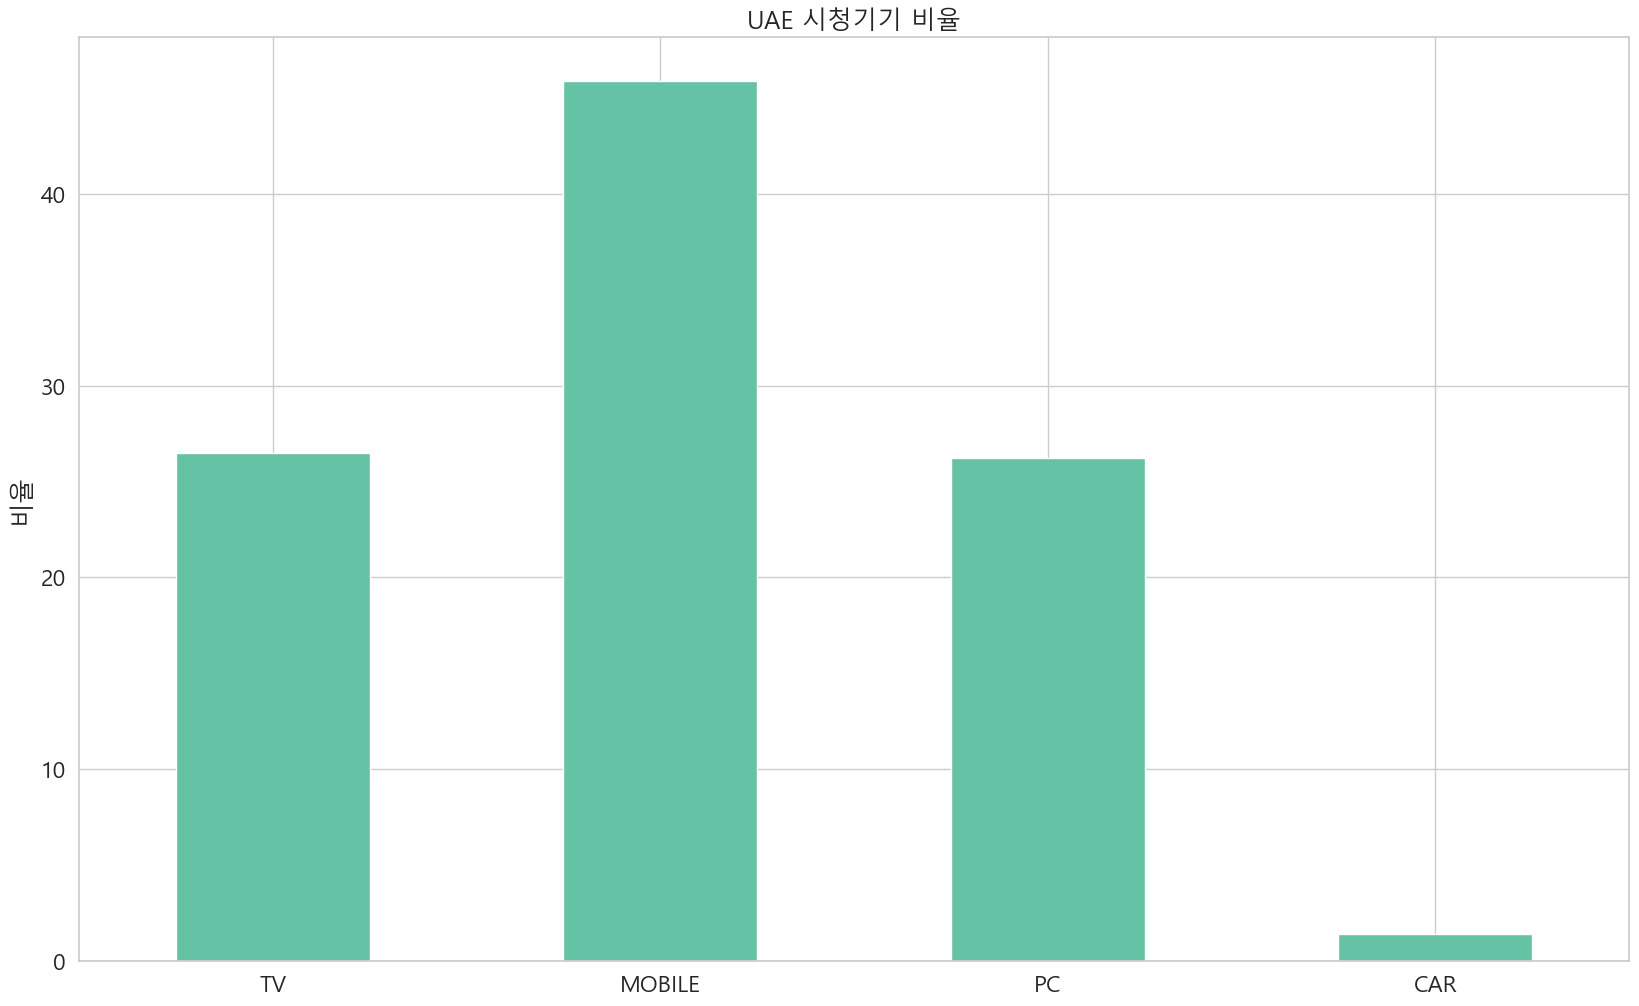

In [6]:
# UAE 데이터 추출
df_UAE = df_total.loc['UAE']

# 그래프 크기 조정
fig, ax = plt.subplots(figsize=(20, 12))

# 막대 그래프 그리기
df_UAE.plot(kind='bar', rot = 0)

# 그래프 제목과 축 레이블 설정
plt.title('UAE 시청기기 비율')
plt.xlabel('')
plt.ylabel('비율')

# 그래프 출력
plt.show()

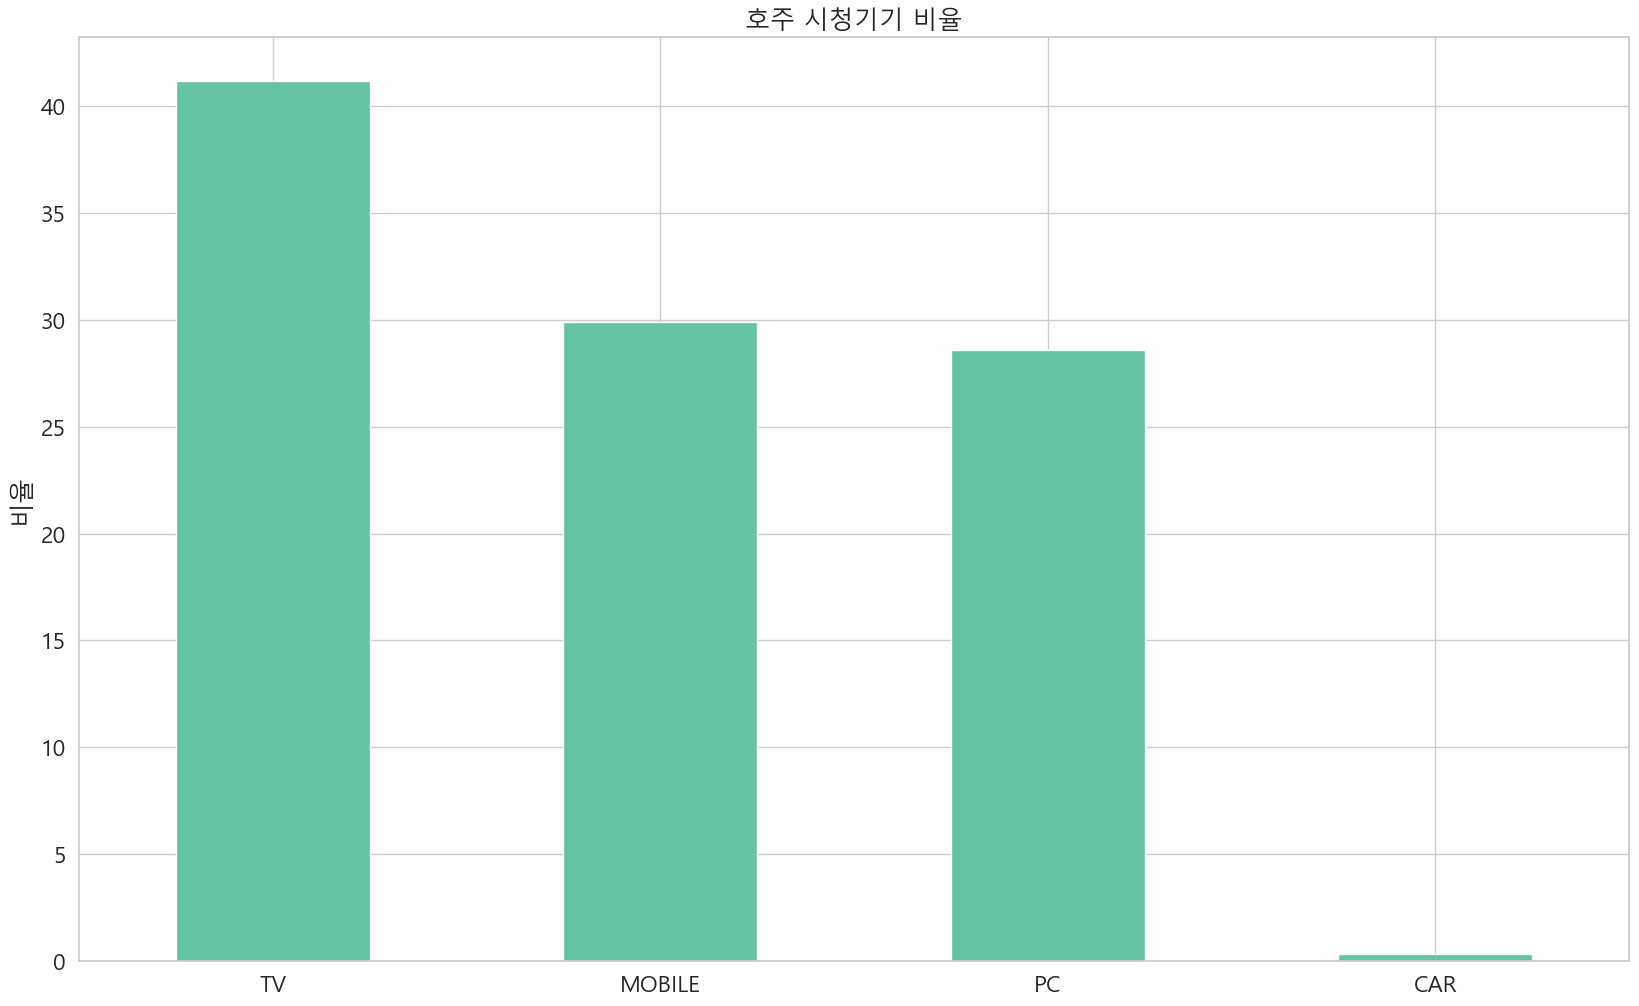

In [7]:
# 호주 데이터 추출
df_AUS = df_total.loc['호주']

# 그래프 크기 조정
fig, ax = plt.subplots(figsize=(20, 12))

# 막대 그래프 그리기
df_AUS.plot(kind='bar', rot = 0)

# 그래프 제목과 축 레이블 설정
plt.title('호주 시청기기 비율')
plt.xlabel('')
plt.ylabel('비율')

# 그래프 출력
plt.show()

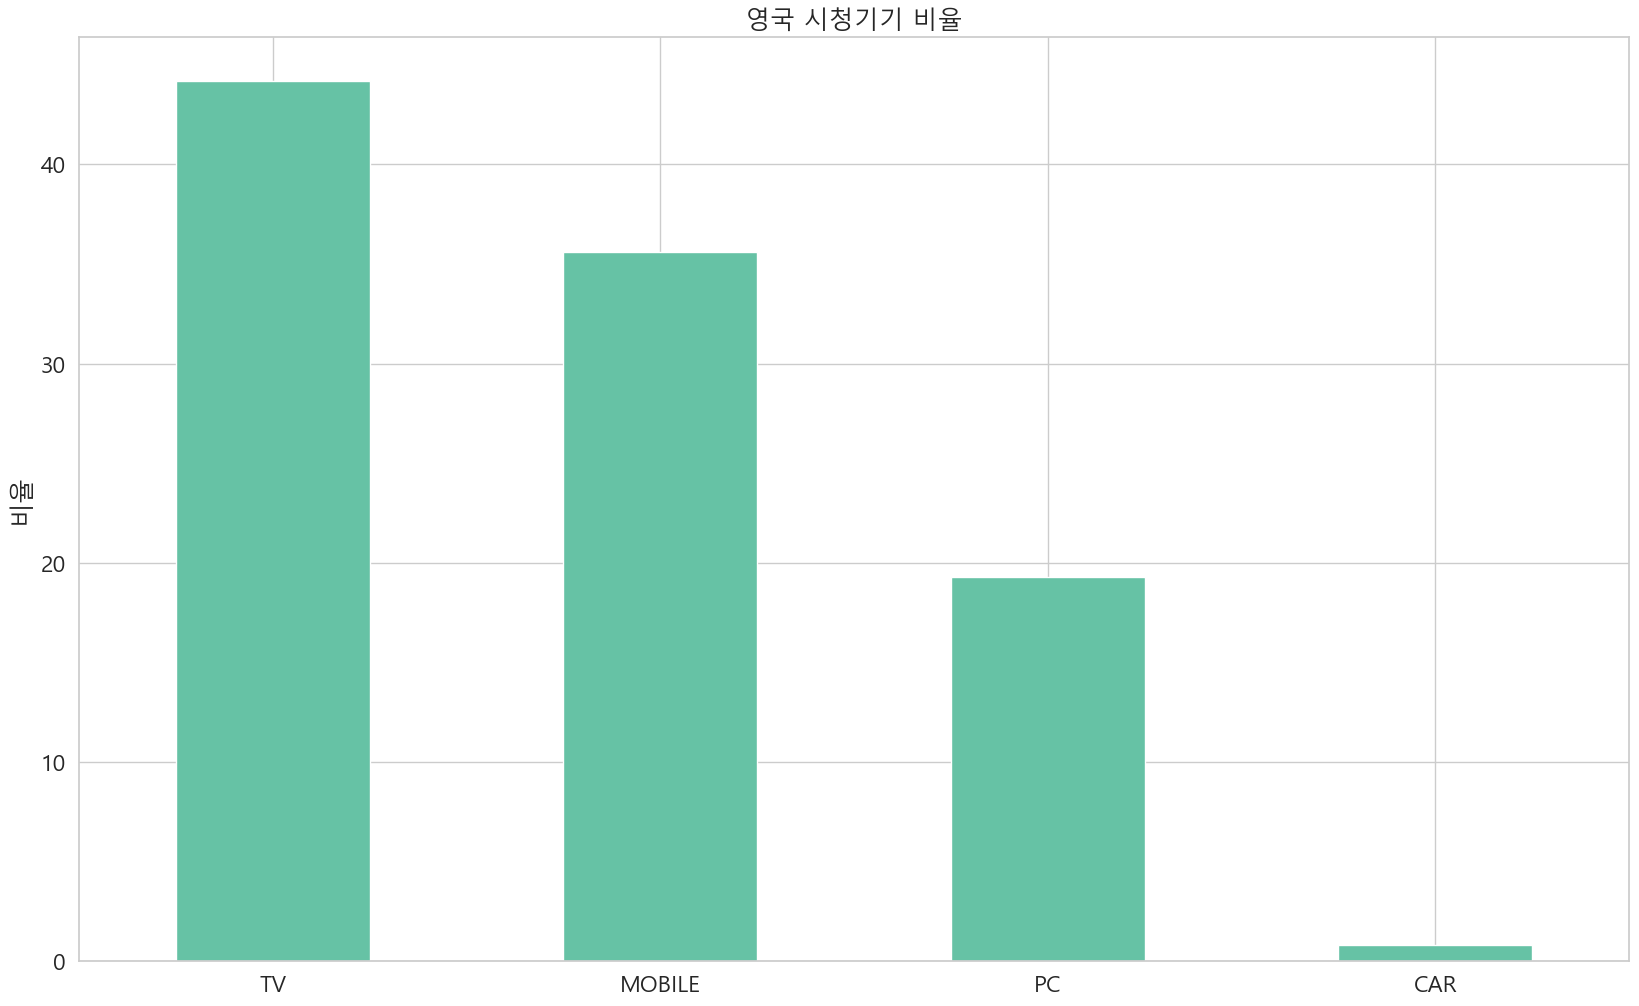

In [8]:
# 영국 데이터 추출
df_UK = df_total.loc['영국']

# 그래프 크기 조정
fig, ax = plt.subplots(figsize=(20, 12))

# 막대 그래프 그리기
df_UK.plot(kind='bar', rot = 0)

# 그래프 제목과 축 레이블 설정
plt.title('영국 시청기기 비율')
plt.xlabel('')
plt.ylabel('비율')

# 그래프 출력
plt.show()

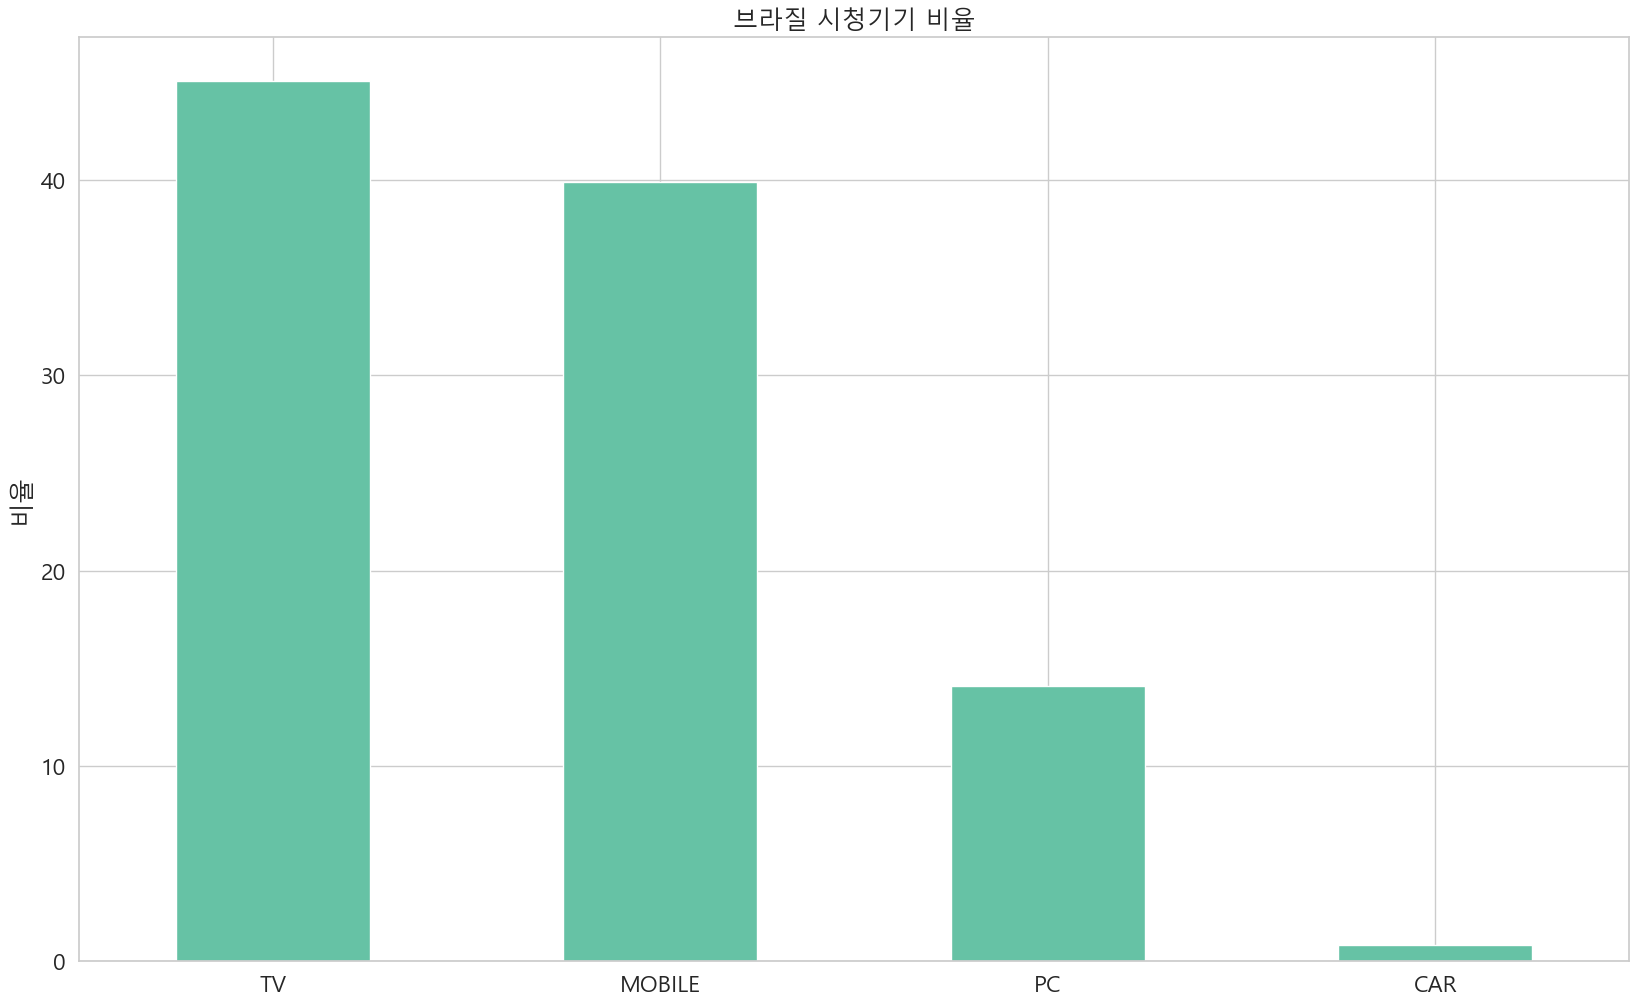

In [9]:
# 브라질 데이터 추출
df_brazil = df_total.loc['브라질']

# 그래프 크기 조정
fig, ax = plt.subplots(figsize=(20, 12))

# 막대 그래프 그리기
df_brazil.plot(kind='bar', rot = 0)

# 그래프 제목과 축 레이블 설정
plt.title('브라질 시청기기 비율')
plt.xlabel('')
plt.ylabel('비율')

# 그래프 출력
plt.show()